In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [2]:
#Importing data
import pandas as pd
import numpy as np
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#Knowing The data
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.duplicated().sum()

0

<ipython-input-8-99e6c696d361>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


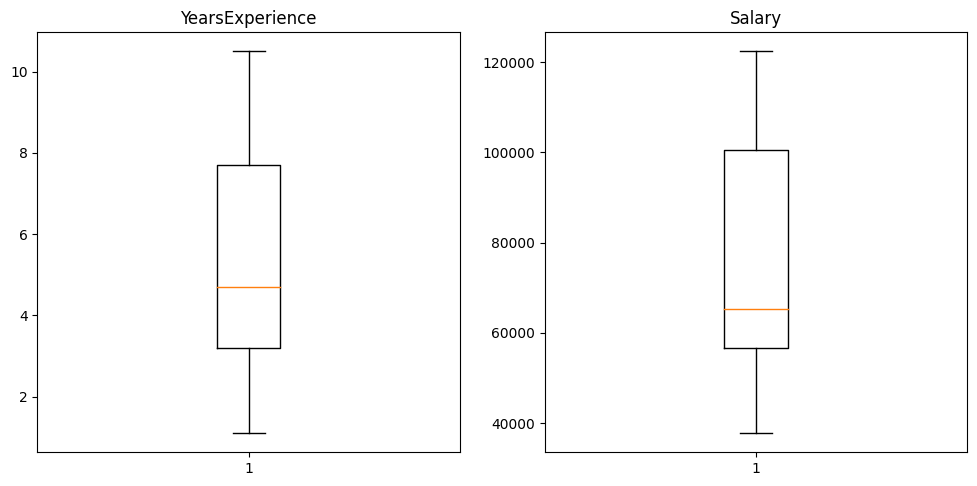

In [8]:
#Exploratory Data Analysis
#Boxplot
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
plt.subplot(221)
plt.boxplot(df['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(222)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.show()

<ipython-input-10-2a689bc49ffe>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


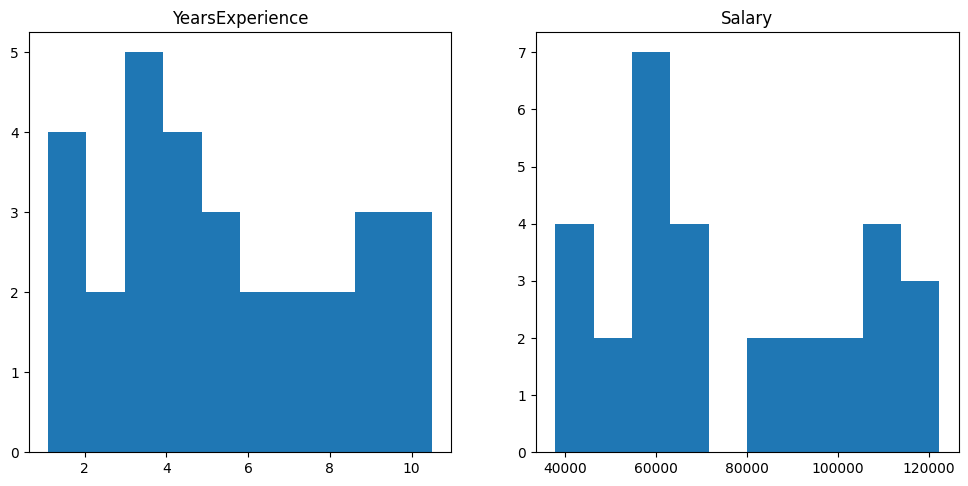

In [10]:
#Histogram
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12))
plt.subplot(221)
plt.hist(df['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(222)
plt.hist(df['Salary'])
plt.title('Salary')
plt.show()

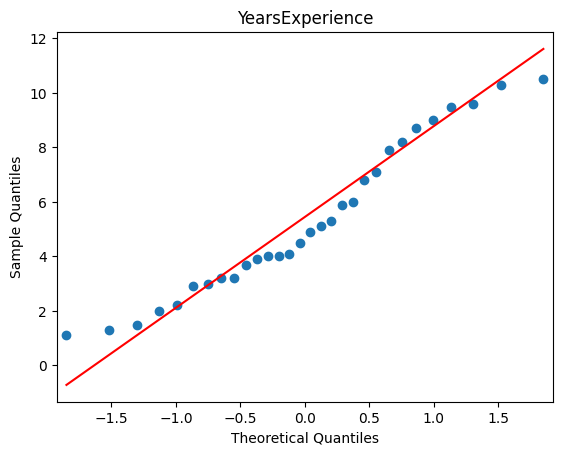

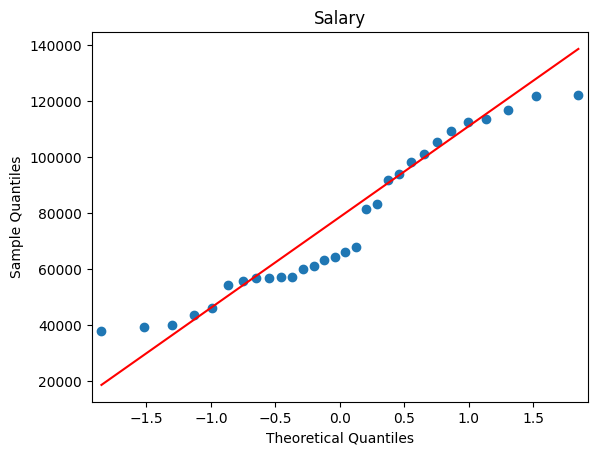

In [11]:
#Q-Q PLot
import statsmodels.api as sm
sm.qqplot(df['YearsExperience'], line = 'q')
plt.title('YearsExperience')
sm.qqplot(df['Salary'], line = 'q')
plt.title('Salary')
plt.show()

In [13]:
x = df['YearsExperience']
y = df['Salary']

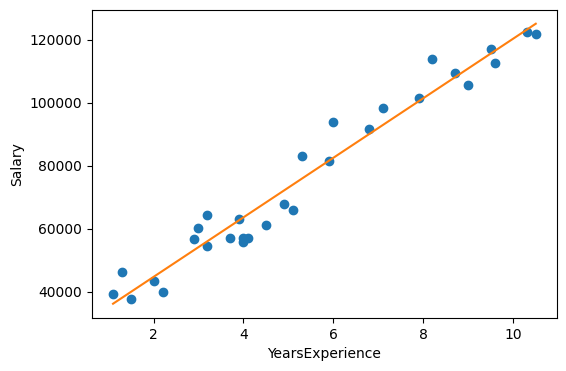

In [14]:
#Scatter Plot
from numpy.polynomial.polynomial import polyfit
plt.figure(figsize=(6,4))
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.scatter(x,y)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()


In [15]:
cor = np.corrcoef(x, y)
cor

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

Correlation Between Delivery Time and Sorting Time is 97.82%

Simple Linear Regression With Data Transformations

1. X,Y
2. LogX,Y
3.  X,LogY
4.  LogX,LogY
5.  X_Square,Y
6.  X,Y_Square
7.  X_Square,Y_Square
8.  Squareroot_X,Y
9.  X,Squareroot_Y
10. Squareroot_X,Squareroot_Y

In [16]:
# X,Y
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    2.56e-24
Time:                        13:58:21   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Log_X,Y
x_log = np.log(df['YearsExperience'])

In [19]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    8.06e-26
Time:                        13:59:36   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#X,Log_Y
y_log = np.log(df['Salary'])

In [22]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    6.09e-12
Time:                        14:00:29   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Log_X,Log_Y
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    8.60e-15
Time:                        14:01:38   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Square_X,y
x_sqr = (df['YearsExperience'])**2
x_sqr

0       1.21
1       1.69
2       2.25
3       4.00
4       4.84
5       8.41
6       9.00
7      10.24
8      10.24
9      13.69
10     15.21
11     16.00
12     16.00
13     16.81
14     20.25
15     24.01
16     26.01
17     28.09
18     34.81
19     36.00
20     46.24
21     50.41
22     62.41
23     67.24
24     75.69
25     81.00
26     90.25
27     92.16
28    106.09
29    110.25
Name: YearsExperience, dtype: float64

In [28]:
model = sm.OLS(y, x_sqr).fit()
predictions = model.predict(x_sqr)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.821
Method:                 Least Squares   F-statistic:                              139.0
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    1.39e-12
Time:                        14:03:22   Log-Likelihood:                         -355.15
No. Observations:                  30   AIC:                                      712.3
Df Residuals:                      29   BIC:                                      713.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1497.1148    126.974     11.791      0.000    1237.424    1756.806
==============================================================================
Omnibus:                        9.689   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.838
Skew:                          -1.307   Prob(JB):                       0.0120
Kurtosis:                       3.484   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#X,Square_y
y_sqr = (df['Salary'])**2
y_sqr

0     1.547872e+09
1     2.134902e+09
2     1.423628e+09
3     1.894426e+09
4     1.591292e+09
5     3.208316e+09
6     3.618022e+09
7     2.964258e+09
8     4.153158e+09
9     3.270582e+09
10    3.996516e+09
11    3.112970e+09
12    3.244100e+09
13    3.258241e+09
14    3.734554e+09
15    4.615572e+09
16    4.359829e+09
17    6.903616e+09
18    6.619938e+09
19    8.824724e+09
20    8.415861e+09
21    9.657583e+09
22    1.026210e+10
23    1.295317e+10
24    1.197514e+10
25    1.114756e+10
26    1.368175e+10
27    1.268664e+10
28    1.497956e+10
29    1.485278e+10
Name: Salary, dtype: float64

In [31]:
model = sm.OLS(y_sqr, x).fit()
predictions = model.predict(x)

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1101.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    1.28e-24
Time:                        14:04:44   Log-Likelihood:                         -671.10
No. Observations:                  30   AIC:                                      1344.
Df Residuals:                      29   BIC:                                      1346.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.289e+09   3.89e+07     33.182      0.000    1.21e+09    1.37e+09
==============================================================================
Omnibus:                        0.965   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.943
Skew:                           0.269   Prob(JB):                        0.624
Kurtosis:                       2.319   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Square_X,Square_Y

In [34]:
model = sm.OLS(y_sqr, x_sqr).fit()
predictions = model.predict(x_sqr)

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              689.3
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    9.19e-22
Time:                        14:05:11   Log-Likelihood:                         -677.90
No. Observations:                  30   AIC:                                      1358.
Df Residuals:                      29   BIC:                                      1359.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.567e+08   5.97e+06     26.255      0.000    1.45e+08    1.69e+08
==============================================================================
Omnibus:                        4.362   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.161
Skew:                          -0.785   Prob(JB):                        0.206
Kurtosis:                       3.250   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Squareroot_X,Y
x_sqrt = np.sqrt(df['YearsExperience'])

In [37]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    3.62e-30
Time:                        14:05:58   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#X,Squareroot_Y
y_sqrt = np.sqrt(df['Salary'])

In [40]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    2.12e-16
Time:                        14:06:39   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Squareroot_X,Squareroot_Y

In [43]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    2.81e-29
Time:                        14:07:36   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary:

Best Model From the above transformations Highest R_Square is 98.9% which is Square Root Transformation of X and no transformation of Y From the above transformations Highest Adjusted R_Square is 98.9%